# Question 2

In [ ]:
library(tidyverse)

The deflection temperature under load for two different formulations of ABS plastic pipe is being studied. Two samples of 12 observations are prepared using each formulation (F1 and F2), and the deflection temperatures (in F) are reported below:

In [48]:
Temperatures <- matrix(
    c(206, 188, 205, 187, 193, 207, 185, 189,
      192, 210, 194, 178, 177, 197, 206, 201,
      176, 185, 200, 197, 198, 188, 189, 203),
      ncol = 2)
colnames(Temperatures) <- c("F1", "F2")
t(Temperatures)
n <- length(Temperatures[,1])
n

F1,206,188,205,187,193,207,185,189,192,210,194,178
F2,177,197,206,201,176,185,200,197,198,188,189,203


[1] 12

The goal is to investigate whether the data support the claim that the mean deflection temperature under load for formulation 2 exceeds that of formulation 1.

a) Use $\alpha=0.05$ to perform a complete analysis in R, including normality check and the appropriate test. Use the rejection region method to test your hypothesis.

Before conducting our hypothesis test it is necessary to check for normailty check and if the variances are equal. We can get an idea of normality by creating QQ plots and we can compare variances using a box plot.

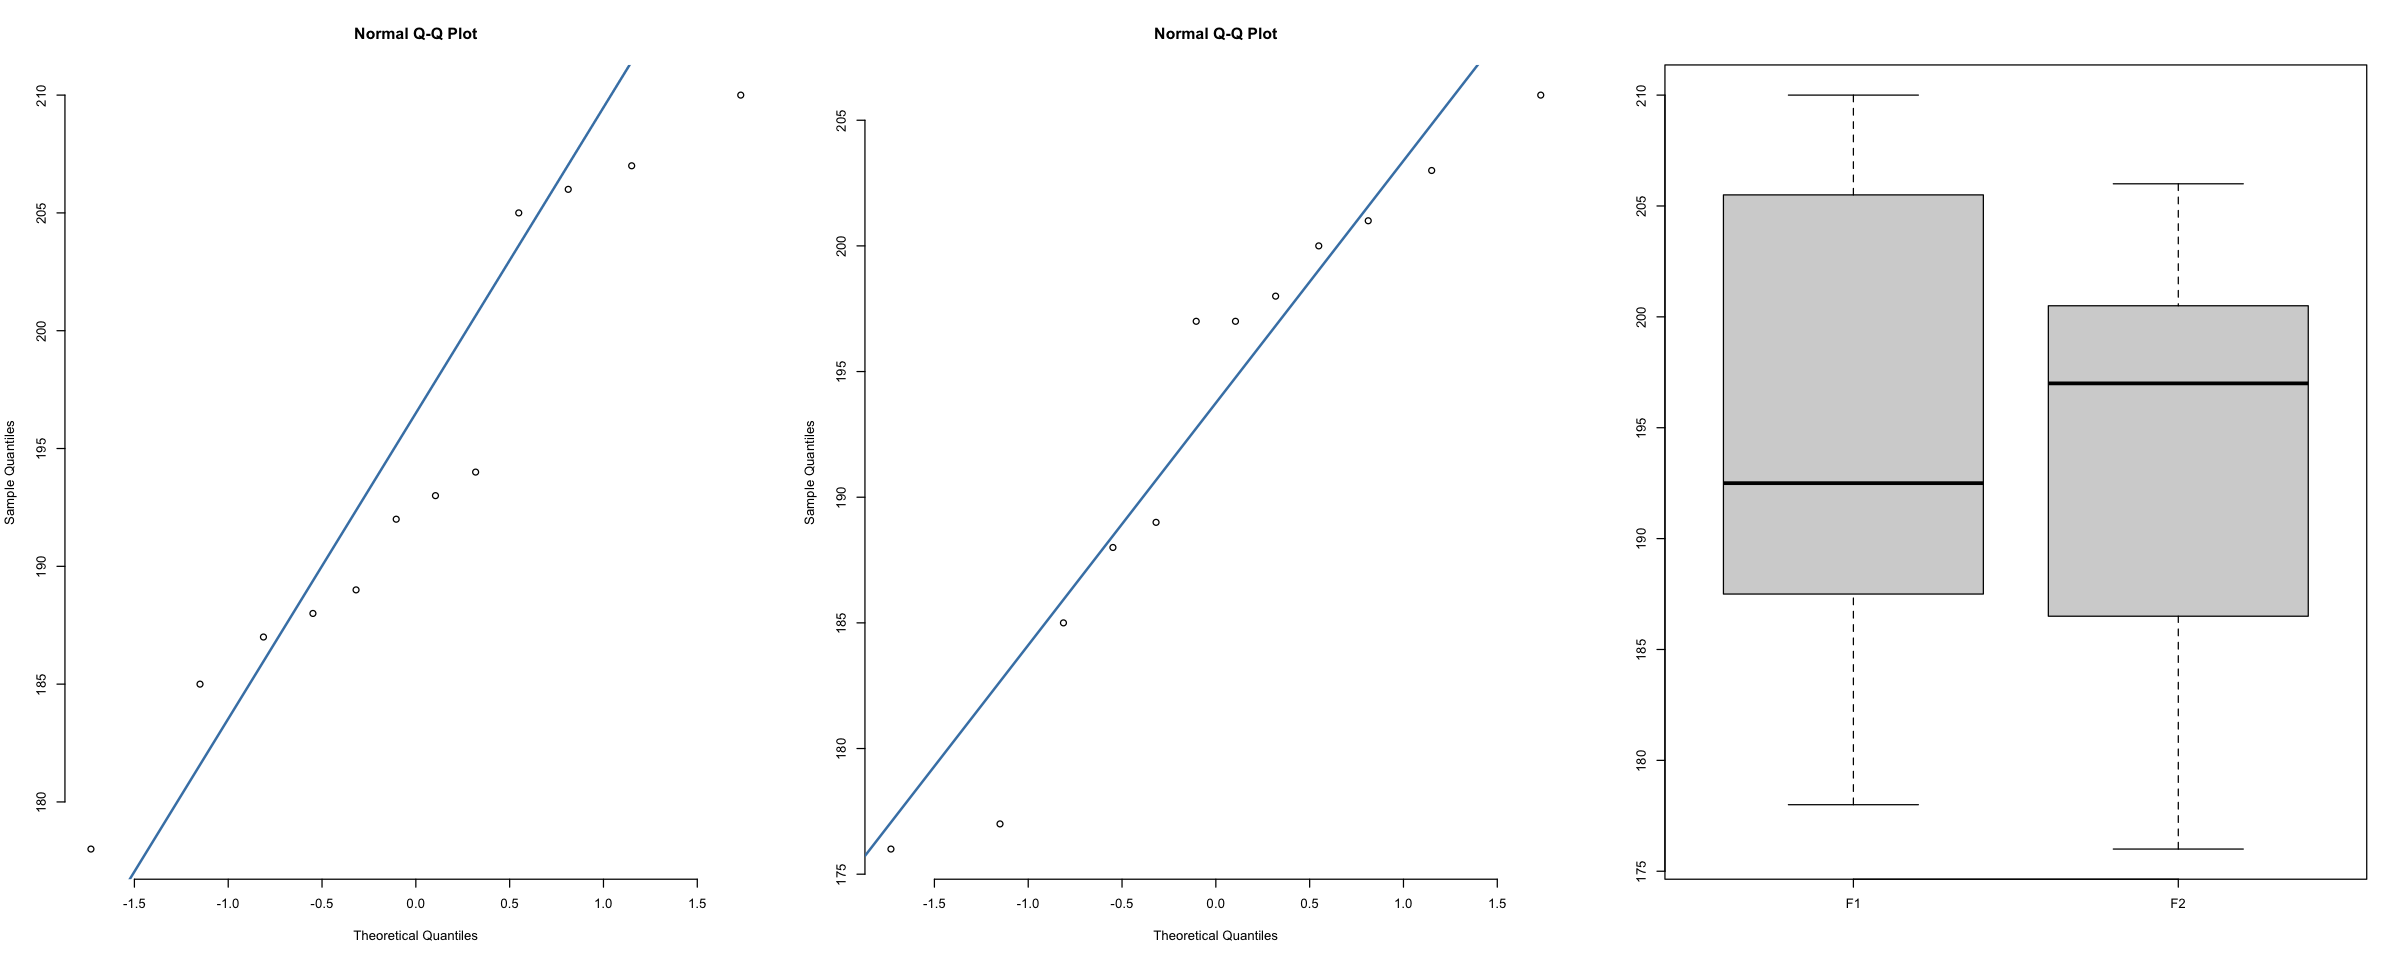

In [44]:
par(mfrow = c(1, 3))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQ plot of first formulation.
qqnorm(Temperatures[,1], pch = 1, frame = FALSE)
qqline(Temperatures[,1], col = "steelblue", lwd = 2)
# QQ plot of second formulation.
qqnorm(Temperatures[,2], pch = 1, frame = FALSE)
qqline(Temperatures[,2], col = "steelblue", lwd = 2)
# Box Plot of formulations.
boxplot(Temperatures)

The QQplots suggest that the entries under each formulation are normally distrubuted. The boxplot shows similar variances for the two distributions. We will varify by conducting a test.

In [45]:
var.test(Temperatures[,1], Temperatures[,2])


	F test to compare two variances

data:  Temperatures[, 1] and Temperatures[, 2]
F = 1.046, num df = 11, denom df = 11, p-value = 0.9419
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3011181 3.6334674
sample estimates:
ratio of variances 
          1.045994 


The p-value of 0.9419 suggests it is unlikely that the two distributions have different variances. We will use this information and assume that the distribution variances are equal in our hypothesis test below.

**Hypothesis Test Using Rejection Rejoin Method**

We are interested in whether the deflection temperature of formulation 2 exceeds formulation 1, thus we can state the null hypothesis as:  
$$ H_0: \mu_1 = \mu_2 \\ H_1: \mu_1 < \mu_2 $$
where $\mu_1$ and $\mu_2$ are the means of the two formulations respectively. We can estimate these values in R with the following:

In [36]:
mu <- matrix(c(colMeans(Temperatures)))
rownames(mu) <- c("mu1", "mu2")
round(mu,2)

mu1,194.50
mu2,193.08


In the analysis above we concluded that we have unknown but equal population variances. This suggests the following test statistic is appropriate: 
$$ t_0 = \frac{ \hat{\mu}_1 - \hat{\mu}_2 }{ S_p \sqrt{ \frac{1}{n_1} + \frac{1}{n_2}}}$$
where $S^2_p$ is the pooled sample variance, calculated as
$$S_p^2 = \frac{ (n_1 - 1)S_1^2 + (n_2 -1)S_2^2 }{ n_1 + n_2 -2}$$

In [57]:
S2_p <- ( (n-1) * var(Temperatures[,1]) + (n-1) * var(Temperatures[,2])) / ( n + n - 2)
t_0 <- unname(( mu[1,] - mu[2,]) / sqrt(2 * S2_p / n) )

b) Does the confidence interval support your conclusion on part a? Justify.

In [54]:
S2_p <- ( (n-1) * var(Temperatures[,1]) + (n-1) * var(Temperatures[,2])) / ( n + n - 2)
S2_p

[1] 101.2689